# 起動・ライブラリの準備

## ライブラリのインポート

In [1]:
# 配列計算ライブラリ NumPy
import numpy as np

# 画像表示用関数
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# tf.Kerasのディープラーニング用クラス
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import utils

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

# tf.Kerasに入っているMnistデータ
from tensorflow.keras.datasets import mnist

# データの準備・加工

## データセットの読み込み

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 学習用画像を1枚表示

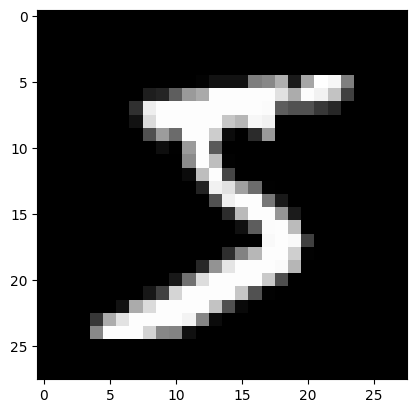

In [3]:
imshow(X_train[0], "gray")

## 学習用正解ラベルを1つ表示

In [4]:
print(y_train[0])

5


## 変数の構造を確認

In [5]:
print(X_train.shape)

(60000, 28, 28)


## 画像の実際の内容を確認

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 前処理１：画像を一次元の配列に変形

In [7]:
x_train = X_train.reshape(60000, 28, 28, 1)
x_test = X_test.reshape(10000, 28, 28, 1)
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


## 前処理２：画素の正規化

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

## 前処理３：正解ラベルのOne-Hotエンコーディング

In [9]:
#★現在のラベルを表示
print(y_train)

[5 0 4 ... 5 6 8]


In [10]:
#★One-Hotエンコーディング
y_train_label = utils.to_categorical(y_train)
y_test_label = utils.to_categorical(y_test)

In [11]:
#★結果を表示
print(y_train_label)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# 学習方法の決定

## ニューラルネットワークモデルを構築

In [12]:
def build_multilayer_perceptron():
    model = Sequential()

    #Conv2D(フィルタ数, ストライド, 入力のサイズ)
    model.add(Conv2D(32, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(64, 3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(128, 3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Dropout(0.5))

    model.add(Flatten())
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [13]:
#★上の関数でモデルを構築
model = build_multilayer_perceptron()

## モデルの構造を確認

In [14]:
#★
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

## モデルのコンパイル

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# 学習

## 学習の実行

In [16]:
history = model.fit(x_train, y_train_label,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_test, y_test_label))

Epoch 1/10
469/469 [==============================] - 40s 83ms/step - loss: 0.4303 - accuracy: 0.8671 - val_loss: 0.1008 - val_accuracy: 0.9690
Epoch 2/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1584 - accuracy: 0.9533 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 3/10
469/469 [==============================] - 40s 86ms/step - loss: 0.1219 - accuracy: 0.9641 - val_loss: 0.0611 - val_accuracy: 0.9812
Epoch 4/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1040 - accuracy: 0.9693 - val_loss: 0.0567 - val_accuracy: 0.9825
Epoch 5/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0886 - accuracy: 0.9735 - val_loss: 0.0491 - val_accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0802 - accuracy: 0.9763 - val_loss: 0.0435 - val_accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0718 - accuracy: 0.9788 - val_loss: 0.0458 - val_accuracy:

# 予測・評価

## 精度の評価

In [17]:
#★
score = model.evaluate(x_test, y_test_label)

313/313 [==============================] - 5s 14ms/step - loss: 0.0398 - accuracy: 0.9880


In [18]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.039764344692230225
Test accuracy: 0.9879999756813049


## 実際の予測

In [19]:
#★
predicts = model.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 4s 12ms/step


predit label is 7
label is 7


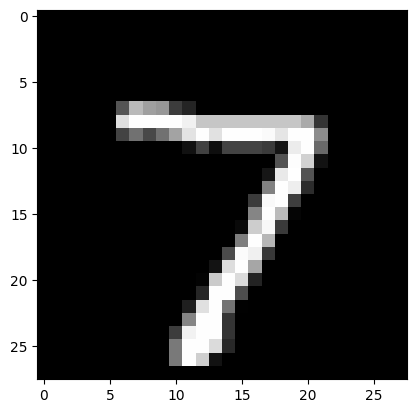

In [20]:
#★ X_test, y_test, predictsの最初の要素[0]を表示
print(f"predit label is {predicts[0]}")
print(f"label is {y_test[0]}")
imshow(x_test[0], "gray")

## 不正解を取得

In [21]:
wrongs = []
for i, (y,predict) in enumerate(zip(y_test,predicts)):
    if y != predict:
        wrongs.append((i,(y, predict)))
wrongs 

[(73, (9, 8)),
 (247, (4, 6)),
 (321, (2, 7)),
 (359, (9, 4)),
 (445, (6, 0)),
 (449, (3, 5)),
 (582, (8, 2)),
 (646, (2, 6)),
 (659, (2, 1)),
 (726, (7, 5)),
 (924, (2, 7)),
 (938, (3, 5)),
 (947, (8, 9)),
 (1014, (6, 5)),
 (1039, (7, 1)),
 (1062, (3, 7)),
 (1112, (4, 6)),
 (1206, (7, 2)),
 (1224, (2, 4)),
 (1226, (7, 2)),
 (1232, (9, 4)),
 (1247, (9, 5)),
 (1260, (7, 1)),
 (1299, (5, 7)),
 (1326, (7, 2)),
 (1364, (8, 2)),
 (1414, (9, 5)),
 (1522, (7, 9)),
 (1554, (9, 8)),
 (1621, (0, 6)),
 (1681, (3, 7)),
 (1790, (2, 7)),
 (1808, (0, 4)),
 (1878, (8, 3)),
 (1901, (9, 4)),
 (1940, (5, 0)),
 (1941, (7, 2)),
 (2016, (7, 2)),
 (2035, (5, 3)),
 (2040, (5, 6)),
 (2044, (2, 7)),
 (2070, (7, 0)),
 (2130, (4, 9)),
 (2135, (6, 1)),
 (2189, (9, 8)),
 (2293, (9, 0)),
 (2299, (2, 7)),
 (2380, (9, 0)),
 (2406, (9, 8)),
 (2414, (9, 8)),
 (2496, (2, 3)),
 (2578, (7, 2)),
 (2597, (5, 3)),
 (2607, (7, 8)),
 (2654, (6, 1)),
 (2927, (3, 2)),
 (2995, (6, 5)),
 (3030, (6, 0)),
 (3225, (7, 9)),
 (3236, (7,

## 不正解画像を表示

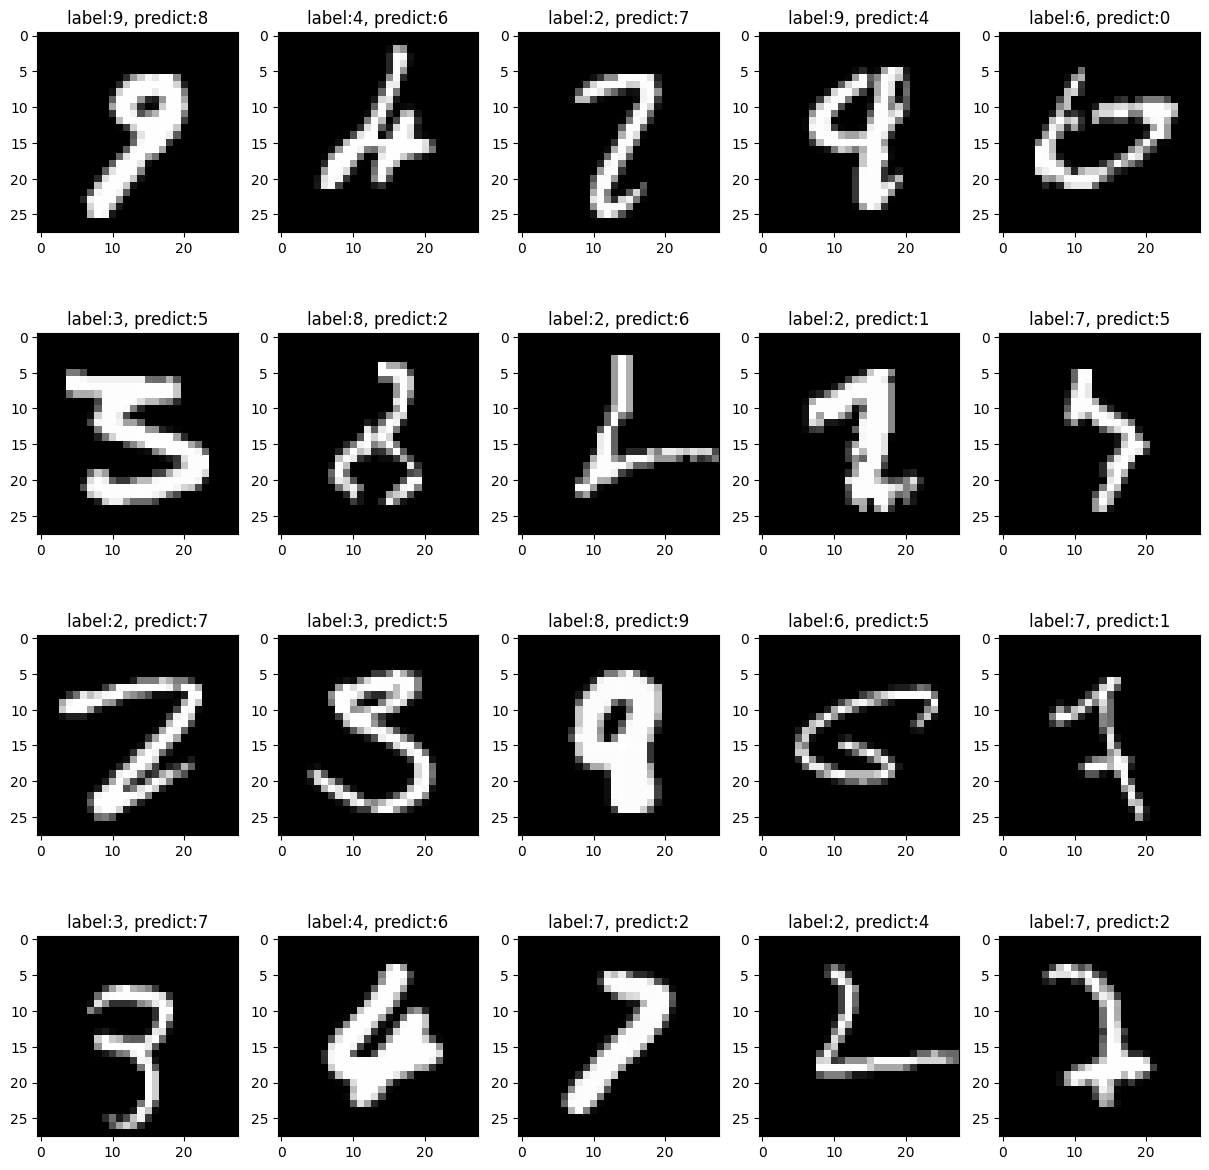

In [22]:
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title(f"label:{label}, predict:{predict}")
    axes.imshow(X_test[index], "gray")

## モデルの保存

In [23]:
model.save("model_cnn_ver2.keras")